In [2]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib notebook

#download data into DataFrame and create moving averages columns
df = data.DataReader('MMM', 'yahoo', start='1/1/2014', end='1/1/2016')

In [3]:
def get_EMA(cps, days, fitting):
    emas = cps.copy()
    for i in range(len(cps)):
        if i == 0:
            emas[i] = cps[i]
        if i > 0:
            emas[i] = ((days + 1 - fitting) * emas[i - 1] + fitting * cps[i]) / (days + 1)
    return emas

In [4]:
df['20ema'] = get_EMA(df['Adj Close'], 12, 2)
df['200ema'] = get_EMA(df['Adj Close'], 200, 2)
df['MACD'] = get_EMA(df['Adj Close'], 12, 2) - get_EMA(df['Adj Close'], 26, 2)
df['signal'] = get_EMA(df['MACD'], 9, 2)
df['diff'] = df['MACD'] - df['signal']
df['up'] = np.nan
df['down'] = np.nan
for i in range(len(df['diff'])):
    if df['diff'][i] > 0:
        df['up'][i] = df['diff'][i]
    elif df['diff'][i] < 0:
        df['down'][i] = df['diff'][i]
#df['20ma'] = df['Adj Close'].rolling(window=20, min_periods=0).mean()

In [5]:
df.tail(30)

,High,Low,Open,Close,Volume,Adj Close,20ema,200ema,MACD,signal,diff,up,down
Date,,,,,,,,,,,,,
2015-11-18,157.500000,156.080002,156.179993,157.389999,2226900.0,138.499985,137.578481,132.511583,1.856362,2.324826,-0.468464,NaN,-0.468464
2015-11-19,158.509995,156.710007,157.630005,158.380005,1518200.0,139.371170,137.854279,132.579838,1.861860,2.232233,-0.370373,NaN,-0.370373
2015-11-20,159.839996,158.339996,158.679993,158.949997,1891100.0,139.872742,138.164812,132.652404,1.884962,2.162779,-0.277817,NaN,-0.277817
2015-11-23,159.770004,158.160004,158.899994,158.649994,1430400.0,139.608780,138.386961,132.721621,1.860523,2.102328,-0.241804,NaN,-0.241804
2015-11-24,158.339996,156.889999,157.369995,157.750000,2100600.0,138.816772,138.453086,132.782270,1.756994,2.033261,-0.276267,NaN,-0.276267
2015-11-25,158.470001,157.630005,158.059998,157.630005,1184100.0,138.711182,138.492793,132.841264,1.647435,1.956096,-0.308661,NaN,-0.308661
2015-11-27,158.490005,156.940002,157.509995,157.990005,876100.0,139.028000,138.575132,132.902823,1.568097,1.878496,-0.310399,NaN,-0.310399
2015-11-30,158.470001,156.570007,158.100006,156.580002,2934200.0,137.787231,138.453917,132.951425,1.389089,1.780615,-0.391525,NaN,-0.391525
2015-12-01,157.669998,156.169998,156.410004,156.899994,2259000.0,138.068817,138.394671,133.002344,1.255474,1.675586,-0.420113,NaN,-0.420113


<IPython.core.display.Javascript object>


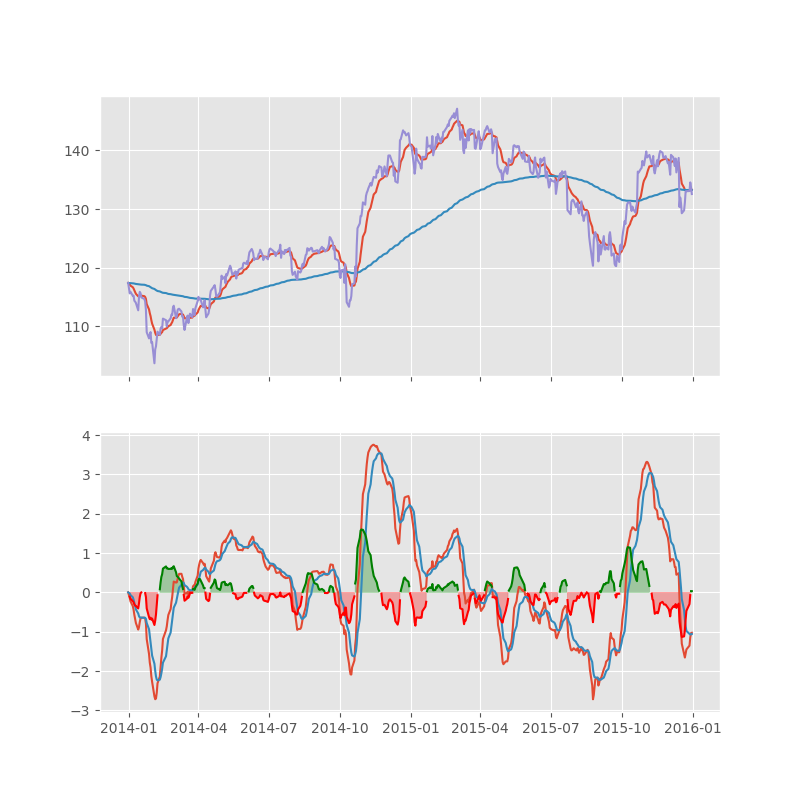

In [20]:
%matplotlib notebook
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8,8))

ax1.plot(df[['20ema', '200ema', 'Adj Close']])

ax2.plot(df[['MACD', 'signal']])
ax2.plot(df.index, df['up'], color='g')
ax2.plot(df.index, df['down'], color='r')
ax2.fill_between(df.index, df['up'], 0, alpha=0.3, color='green')
ax2.fill_between(df.index, df['down'], 0, alpha=0.3, color='red')

plt.show()